In [192]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
from sklearn.preprocessing import OrdinalEncoder
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-evaluation-data-set/car_evaluation.csv


In [193]:
df =pd.read_csv('/kaggle/input/car-evaluation-data-set/car_evaluation.csv')

In [194]:
df.head()


,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [195]:
df.shape

(1727, 7)

In [196]:
col_names =['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns= col_names
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [197]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [198]:
x= df.drop(['class'],axis=1)
y=df['class']

In [199]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)


In [200]:
import category_encoders as ce

In [201]:
encoder=ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
x_train=encoder.fit_transform(x_train)
x_test=encoder.transform(x_test)

In [202]:
x_train.head()

,buying,maint,doors,persons,lug_boot,safety
714,1,1,1,1,1,1
320,2,1,2,2,2,2
1442,3,2,3,1,1,2
1603,3,1,2,1,3,3
565,1,2,4,2,2,3


In [203]:
x_test.head()

,buying,maint,doors,persons,lug_boot,safety
1348,3,3,3,2,2,3
1142,4,1,1,1,3,2
1213,4,4,4,2,2,3
1224,4,4,3,1,3,1
768,1,4,4,1,1,1


In [204]:
rfc=RandomForestClassifier(n_estimators=10,random_state=0)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
print("accuracy_score",accuracy_score(y_test, y_pred))

accuracy_score 0.9595375722543352


In [205]:
rfc_100=RandomForestClassifier(n_estimators=100,random_state=0)
rfc_100.fit(x_train,y_train)
y_pred_100=rfc_100.predict(x_test)
print("accuracy_score",accuracy_score(y_test, y_pred_100))

accuracy_score 0.9730250481695568


In [206]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(x_train, y_train)



RandomForestClassifier(random_state=0)

In [207]:
feature_scores = pd.Series(clf.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_scores

safety      0.276240
persons     0.226310
maint       0.190889
buying      0.138726
lug_boot    0.093743
doors       0.074091
dtype: float64

We can see that the most important feature is safety and least important feature is doors.


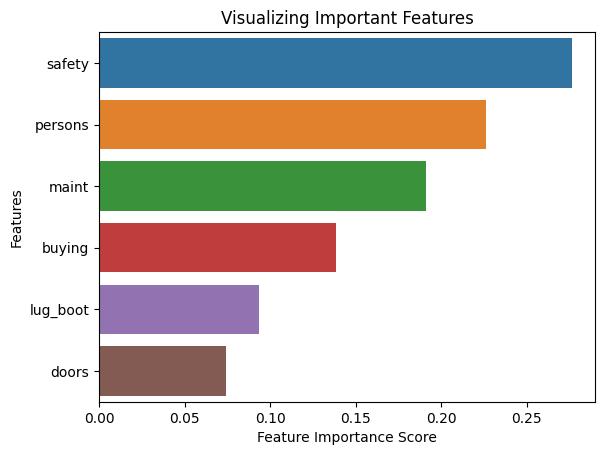

In [208]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()

Now, I will drop the least important feature doors from the model, rebuild the model and check its effect on accuracy.

In [209]:
# declare feature vector and target variable

x = df.drop(['class', 'doors'], axis=1)

y = df['class']

In [210]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42,stratify=y)

Now, I will build the random forest model and check accuracy.

In [211]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'persons', 'lug_boot', 'safety'])


x_train = encoder.fit_transform(x_train)

x_test = encoder.transform(x_test)

In [212]:
clf = RandomForestClassifier(random_state=0)



# fit the model to the training set

clf.fit(x_train, y_train)

xz
# Predict on the test set results

y_pred = clf.predict(x_test)
print("accuracy_score",accuracy_score(y_test, y_pred))


accuracy_score 0.953757225433526


In [213]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[106   0   8   1]
 [  1  18   0   2]
 [ 10   0 353   0]
 [  1   1   0  18]]


In [214]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.90      0.92      0.91       115
        good       0.95      0.86      0.90        21
       unacc       0.98      0.97      0.98       363
       vgood       0.86      0.90      0.88        20

    accuracy                           0.95       519
   macro avg       0.92      0.91      0.92       519
weighted avg       0.95      0.95      0.95       519



 have removed the doors variable from the model, rebuild it and checked its accuracy. The accuracy of the model with doors variable removed is 0.9264. The accuracy of the model with all the variables taken into account is 0.9247. So, we can see that the model accuracy has been improved with doors variable removed from the model.

Furthermore, the second least important model is lug_boot. If I remove it from the model and rebuild the model, then the accuracy was found to be 0.8546. It is a significant drop in the accuracy. So, I will not drop it from the model.

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.

We have another tool called Confusion matrix that comes to our rescue.